In [1]:
import argparse
import numpy as np
import os
import ANNNIstates as ANNNI
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import ANNNIgen 
folder = '../runs/'

In [2]:
TT = ANNNI.mps(folder = f'../tensor_data/12/', gpu=True)
TT.train_enc(epochs=100, train_index=0)

Label: [0]
Number of training points: 4


  0%|          | 0/100 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
Loss: 0.02234: 100%|██████████| 100/100 [00:13<00:00,  7.31it/s]


 91%|█████████ | 400/441 [00:03<00:00, 193.33it/s]

array([0.02168071, 0.02168071, 0.02168065, 0.02168065, 0.02168071,
       0.02168065, 0.02168065, 0.02168065, 0.02168071, 0.02168071,
       0.89648426, 1.33598101, 1.33598101, 1.33598137, 1.33598101,
       1.33598137, 1.33598137, 1.33598101, 1.33598101, 1.33598137,
       1.33598137, 0.03051233, 0.03194863, 0.03283364, 0.03367549,
       0.03566229, 0.03729206, 0.03928787, 0.04219544, 0.04718161,
       0.11559963, 1.00621963, 1.17718458, 1.32718015, 1.32898653,
       1.3300997 , 1.33060026, 1.33141017, 1.33191371, 1.33229387,
       1.33247292, 1.33272779, 0.05677724, 0.06026942, 0.06400704,
       0.06892991, 0.07483864, 0.08278227, 0.0947839 , 0.11592972,
       0.26563245, 1.04005384, 1.01512349, 1.10419166, 1.1598326 ,
       1.28664386, 1.30890703, 1.31368089, 1.31672549, 1.31905532,
       1.32088041, 1.32227731, 1.32353771, 0.09829807, 0.10686928,
       0.11604607, 0.12814224, 0.14472997, 0.16879427, 0.21317607,
       0.40300685, 0.89620501, 1.01801062, 1.02088165, 1.04747

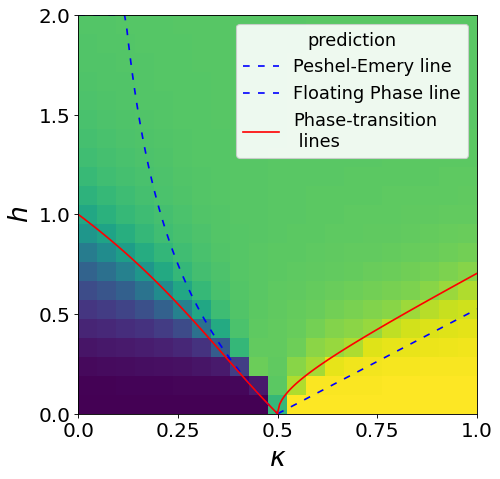

100%|██████████| 441/441 [00:13<00:00, 193.33it/s]

In [3]:
TT.compress(serial = True)

In [10]:
load = 'test'
title = 'popi'
save = 'pipi'

In [18]:
PREDICTIONS = np.loadtxt(f'{folder}{load}/predict')

side = np.sqrt(PREDICTIONS.shape[0]).astype(int)

# cheat the system creating a fake mps class
class fakemps:
    def __init__(self, side, kappa_max = 1, h_max = 2):
        self.ks,  self.hs  = np.linspace(0,kappa_max,side), np.linspace(0,h_max,side)
        self.kappa_max, self.h_max = kappa_max, h_max

mps = fakemps(side)

array([[0.83640695, 0.13963607, 0.0092814 , 0.01222289],
       [0.83640695, 0.13963607, 0.0092814 , 0.01222289],
       [0.8360765 , 0.13954732, 0.00926267, 0.01225016],
       ...,
       [0.10561224, 0.72248906, 0.07365651, 0.09786569],
       [0.10507918, 0.72052652, 0.07444423, 0.09950268],
       [0.1045935 , 0.71868384, 0.07527081, 0.10119542]])

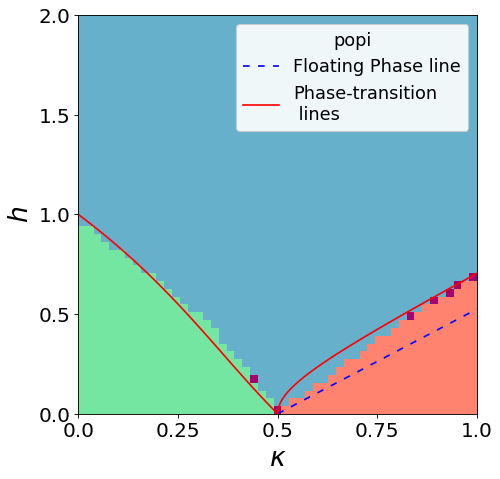

: 

In [22]:
# Color for representing plots with
#   3 Phases (Ferromagnetic, Paramagnetic, Antiphase)
#   4 Phases : 3 Phases + Floating Phase
col3 = [[0.456, 0.902, 0.635, 1],
                [0.400, 0.694, 0.800, 1],
                [0.922, 0.439, 0.439, 1]]

col4 = [[0.456, 0.902, 0.635, 1],
                [0.400, 0.694, 0.800, 1],
                [1.000, 0.514, 0.439, 1],
                [0.643, 0.012, 0.435, 1]]

col8 = [[0.5, 0.9, 0.6, 1],
                [0.4, 0.7, 0.8, 1],
                [1.0, 0.5, 0.4, 1],
                [0.9, 0.9, 0.0, 1],
                [0.5/2, 0.9/2, 0.6/2, 1],
                [0.4/2, 0.7/2, 0.8/2, 1],
                [1.0/2, 0.5/2, 0.4/2, 1],
                [0.9/2, 0.9/2, 0.0/2, 1]]

# Relative colormaps
cm3 = ListedColormap(col3, name='color3')
cm4 = ListedColormap(col4, name='color4')
cm8 = ListedColormap(col8, name='color8')

def plotpredictions():
    ARGPREDICTIONS = np.argmax(PREDICTIONS, axis=1)

    cmap = cm3
    # If it detected a 4th class, the colormap is different
    if len(np.unique(ARGPREDICTIONS)) == 4:
        cmap = cm4 

    ANNNIgen.plot_layout(mps, False, True, True, title, figure_already_defined = False)
    plt.imshow(np.flip(np.reshape(ARGPREDICTIONS, (side, side)), axis=0), cmap=cmap)
    plt.savefig(f'{folder}{load}/{save}')

    return PREDICTIONS

plotpredictions()        
